In [6]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [10]:
def identifica_bandeira(img):
    resultados = []

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, mask = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY)

    contornos, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for contorno in contornos:
        x, y, w, h = cv2.boundingRect(contorno)
        if w < 20 or h < 20:
            continue

        bandeira = img[y:y+h, x:x+w]
        bandeira_resized = cv2.resize(bandeira, (90, 60))

        faixa1 = np.mean(bandeira_resized[:, :30].reshape(-1, 3), axis=0)
        faixa2 = np.mean(bandeira_resized[:, 30:60].reshape(-1, 3), axis=0)
        faixa3 = np.mean(bandeira_resized[:, 60:].reshape(-1, 3), axis=0)

        def is_white(c): return np.min(c) > 180
        def is_red(c): return c[2] > 120 and c[1] < 100
        def is_green(c): return c[1] > 120 and c[0] < 100
        def is_orange(c): return c[2] > 150 and c[1] > 100 and c[0] < 80

        pais = "desconhecido"

        if is_red(faixa1) and is_white(faixa2) and is_red(faixa3):
            pais = "peru"
        elif is_green(faixa1) and is_white(faixa2) and is_red(faixa3):
            pais = "italia"
        elif is_green(faixa1) and is_white(faixa2) and is_orange(faixa3):
            pais = "irlanda"
        else:
            top = np.mean(bandeira_resized[:30].reshape(-1, 3), axis=0)
            bottom = np.mean(bandeira_resized[30:].reshape(-1, 3), axis=0)
            if is_red(top) and is_white(bottom):
                branco = cv2.cvtColor(bandeira_resized, cv2.COLOR_BGR2GRAY)
                if np.count_nonzero(branco > 200) > 100:
                    pais = "singapura"
                else:
                    pais = "monaco"

        resultados.append((pais, (x, y), (x + w, y + h)))

    return resultados


In [8]:
## nao alterar essa função
# Função para desenhar as bandeiras identificadas
def draw_bandeiras(lista_bandeiras, bgr):
    try:
        for bandeira in lista_bandeiras:
            cv2.rectangle(bgr, bandeira[1], bandeira[2], (255, 0, 0), 5)
            cv2.putText(bgr, bandeira[0], bandeira[1], cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)
        return bgr
    except Exception as e:
        return bgr

[('singapura', (192, 496), (457, 674)), ('singapura', (726, 163), (984, 370)), ('peru', (119, 121), (381, 296))]


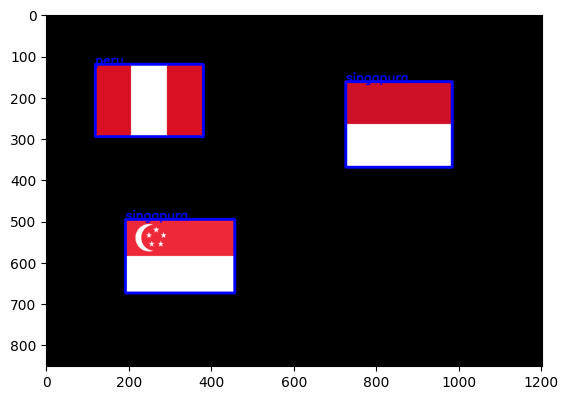

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

## Para testar a função identifica_bandeira
# Você pode testar a função identifica_bandeira com as imagens de teste fornecidas

img = cv2.imread('img/teste1.png')
# img = cv2.imread('img/teste2.png')
# img = cv2.imread('img/teste3.png')
# img = cv2.imread('img/teste4.png')

# Chamar a função identifica_bandeira
resultado = identifica_bandeira(img)

# Imprimir o resultado da função identifica_bandeira 
print(resultado)

# Desenhar as bandeiras na imagem
bgr = draw_bandeiras(resultado, img)
plt.imshow(cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB))
plt.show()
